In [3]:
# https://www.analyticsvidhya.com/blog/2020/02/learn-image-classification-cnn-convolutional-neural-networks-3-datasets/
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Conv2D, MaxPool2D, Flatten
from keras.utils import np_utils
# to calculate accuracy
from sklearn.metrics import accuracy_score
from matplotlib import pyplot as plt

In [5]:
# loading the dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()
# building the input vector from the 28x28 pixels
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
# normalizing the data to help with the training
X_train /= 255
X_test /= 255

(28, 28)
(60000, 28, 28)
(28, 28, 1)
(60000, 28, 28, 1)
[[[0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]]

 [[0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]]

 [[0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.     

In [26]:
# one-hot encoding using keras' numpy-related utilities
n_classes = 10
print("Shape before one-hot encoding: ", y_train.shape)
Y_train = np_utils.to_categorical(y_train, n_classes)
Y_test = np_utils.to_categorical(y_test, n_classes)
print("Shape after one-hot encoding: ", Y_train.shape)
print(Y_train)

[5 0 4 ... 5 6 8]
Shape before one-hot encoding:  (60000,)
Shape after one-hot encoding:  (60000, 10)
[[0. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]]


In [4]:
# building a linear stack of layers with the sequential model
model = Sequential()
# convolutional layer
model.add(Conv2D(25, kernel_size=(3,3), strides=(1,1), padding='valid', activation='relu', input_shape=(28,28,1)))
model.add(MaxPool2D(pool_size=(1,1)))
# flatten output of conv
model.add(Flatten())
# hidden layer
model.add(Dense(100, activation='relu'))
# output layer
model.add(Dense(10, activation='softmax'))
# compiling the sequential model
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')
# training the model for 10 epochs
model.fit(X_train, Y_train, batch_size=128, epochs=10, validation_data=(X_test, Y_test))

Epoch 1/10
469/469 [==============================] - 57s 118ms/step - loss: 0.3657 - accuracy: 0.8916 - val_loss: 0.0715 - val_accuracy: 0.9783
Epoch 2/10
469/469 [==============================] - 44s 95ms/step - loss: 0.0619 - accuracy: 0.9822 - val_loss: 0.0554 - val_accuracy: 0.9822
Epoch 3/10
469/469 [==============================] - 51s 109ms/step - loss: 0.0360 - accuracy: 0.9895 - val_loss: 0.0576 - val_accuracy: 0.9803
Epoch 4/10
469/469 [==============================] - 46s 99ms/step - loss: 0.0228 - accuracy: 0.9929 - val_loss: 0.0522 - val_accuracy: 0.9822
Epoch 5/10
469/469 [==============================] - 44s 95ms/step - loss: 0.0142 - accuracy: 0.9960 - val_loss: 0.0600 - val_accuracy: 0.9815
Epoch 6/10
469/469 [==============================] - 50s 107ms/step - loss: 0.0091 - accuracy: 0.9974 - val_loss: 0.0569 - val_accuracy: 0.9838
Epoch 7/10
469/469 [==============================] - 51s 108ms/step - loss: 0.0057 - accuracy: 0.9988 - val_loss: 0.0619 - val_accur

In [5]:
Y_pred= model.predict(X_test)

In [7]:
Y_pred.shape

(10000, 10)

In [9]:
Y_pred[0,:] # obtener el índice del mayor

array([6.4718576e-13, 1.2905382e-13, 8.6316010e-11, 7.3679224e-10,
       4.5805497e-17, 9.6353177e-13, 3.8106502e-21, 1.0000000e+00,
       4.6630741e-11, 7.2475710e-09], dtype=float32)

In [11]:
Y_test[0,:]

array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0.], dtype=float32)

In [12]:
X_test.shape

(10000, 28, 28, 1)

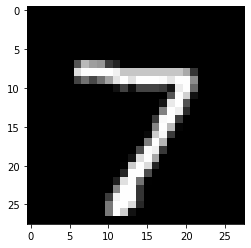

In [16]:
plt.figure()
plt.imshow(X_test[0,:,:,0], cmap="gray")
plt.show()